# Ground Truth vs Predicted Sentiment

In [1]:
import pandas as pd
from functools import reduce
from datetime import date, timedelta,datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle("../full_db.pkl")

df = df[df.entities.str.len()>0]
df = df[~df.sentiment_value.isna()]
df = df[df.created_at < "2021-09-07"]

new_df = []
for idx, row in df.iterrows():
    d = row.to_dict()
    for vax in d["vaccines"]:
        d2 = d.copy()
        del d2["vaccines"]
        d2["vaccine_name"] = vax
        new_df.append(d2)
df = pd.DataFrame(new_df)

# df.created_at = pd.to_datetime(df.created_at)

In [3]:
df = pd.read_pickle("../data/subset_800.pkl")
df["ymonth"] = df.created_at.str[:7]
df

,user_name,sentiment_gold,sentiment_pred,entities_gold,entities_pred,tweet_id,user_id,created_at,ymonth
0,TomNow,-1,-1,[transverse myelitis],[myelitis],1337431495150096386,36489765,2020-12-11,2020-12
1,AkshatRathi,-1,-1,[],[],1337427254385709059,13766492,2020-12-11,2020-12
2,info_zampa,0,0,[],[],1337427678312460296,1265964896090456064,2020-12-11,2020-12
3,scooperpr,0,0,[],[],1337428331617107968,20106410,2020-12-11,2020-12
4,HealthWatch123,0,-1,[],[],1337428480364077059,2670271687,2020-12-11,2020-12
...,...,...,...,...,...,...,...,...,...
795,totallyfearless,1,1,[],[],1430917523642462209,1584352400,2021-08-26,2021-08
796,1u1humanity,-1,0,[blood clot risk],[],1423807831459831814,1275084375839797250,2021-08-07,2021-08
797,tsyiblkhealth,0,0,[],[],1432021957571186693,1260346784892817409,2021-08-29,2021-08
798,reofiras,0,0,[],[],1425705494535020546,599875685,2021-08-12,2021-08


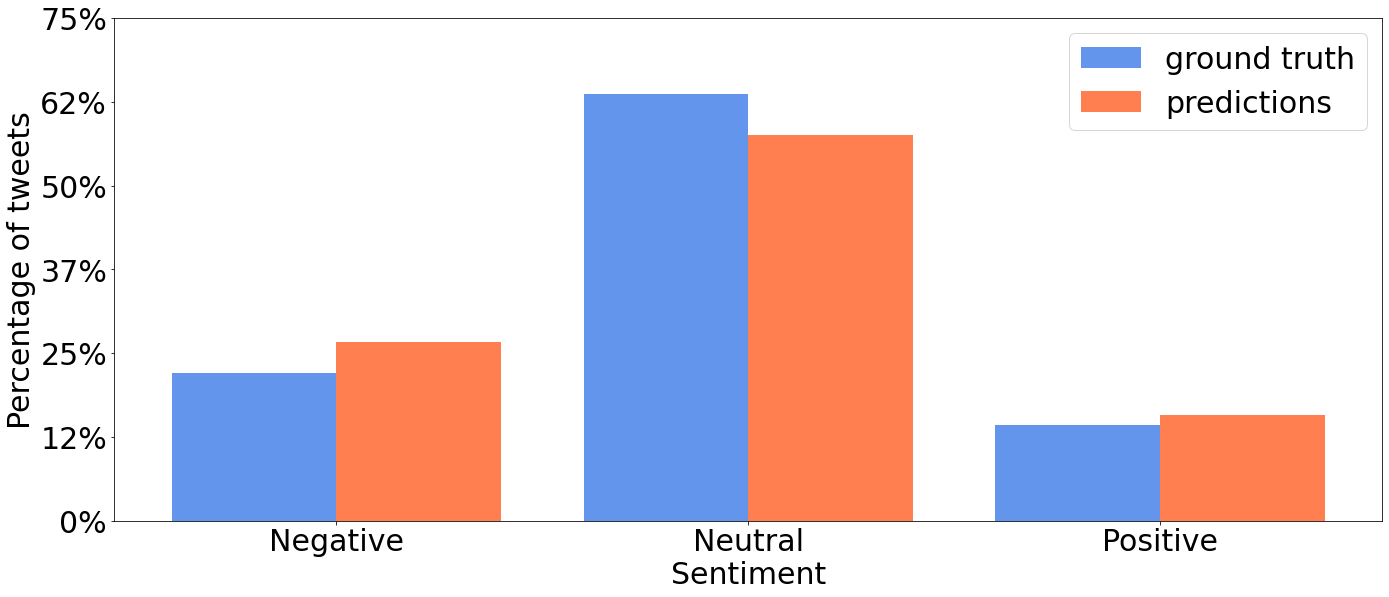

In [4]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.ymargin'] = 0.003

plt.figure(figsize=(20,9))

plt.hist(
    [df.sentiment_gold.astype(int), df.sentiment_pred.astype(int)],
    label=['ground truth', 'predictions'],
    bins=[-1.5,-0.5, 0.5, 1.5],
    color=["cornflowerblue","coral"]
)
plt.legend()
plt.xticks([-1,0,1], ["Negative", "Neutral", "Positive"])
plt.yticks(plt.yticks()[0], [str(int(x/800*100))+"%" for x in plt.yticks()[0]])
plt.ylabel("Percentage of tweets")
plt.xlabel("Sentiment")

plt.tight_layout()
plt.savefig("output/plot_sentiment.pdf")
plt.savefig("output/plot_sentiment.png")
plt.show()

In [6]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,_ = precision_recall_fscore_support(
    df.sentiment_gold,
    df.sentiment_pred,
    average='macro'
)

print(f"""
Precision | {round(p*100, 2)}
Recall    | {round(r*100, 2)}
F1 Score  | {round(f*100, 2)}
""")


Precision | 67.99
Recall    | 71.71
F1 Score  | 69.52

